In [ ]:
!pip install Sastrawi
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn

In [ ]:
!pip install pydotplus

In [ ]:
#mount process for access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import string
import os
import re
from datetime import datetime

# Import matplotlib library for visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import NLTK library - word_tokenize library for tokenization process using nltk
# for process of pos-tagging, lemmatization and cleaning the stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Import Sklearn Library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn import model_selection, svm
from sklearn import svm #for svm algorithm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# ------------------------------------------------------------------------------------------------------------------------------------
# Additional library for data pre-processing process
import spacy
import csv

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pydotplus
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
from scipy.spatial import distance
from six import StringIO
from IPython.display import Image
porter_stemmer = PorterStemmer()

#for stopwords removal
from spacy.lang.en import English

#load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
from spacy.lang.en.stop_words import STOP_WORDS
sp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**SVM Classifier Algorithm (Support vector machine Algorithm)**

data training 70% dan data testing 30% dengan menjadikan test_size=0.3

**Hold-Out Method**

In [ ]:
corpus = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_2.1_nolemma.xlsx')

In [ ]:
corpus.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Do you have sympathy for the children in North...,do you have sympathy for the children in north...,"['do', 'you', 'have', 'sympathy', 'for', 'the'...","[('do', 'VBP'), ('you', 'PRP'), ('have', 'VB')...","['sympathy', 'children', 'northern', 'pakistan...","['sympathi', 'children', 'northern', 'pakistan...",-0.05,negatif
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's a Muslim but a Shia so don'...,i don't think it's a muslim but a shia so don'...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'a', '...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,Hopefully the last time before being suspended...,hopefully the last time before being suspended...,"['hopefully', 'the', 'last', 'time', 'before',...","[('hopefully', 'RB'), ('the', 'DT'), ('last', ...","['hopefully', 'last', 'time', 'suspended', ','...","['hope', 'last', 'time', 'suspend', ',', 'crit...",0.00,netral
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,"Wow, even though the Saudis are only backing u...","wow, even though the saudis are only backing u...","['wow', ',', 'even', 'though', 'the', 'saudis'...","[('wow', 'NN'), (',', ','), ('even', 'RB'), ('...","['wow', ',', 'even', 'though', 'saudis', 'back...","['wow', ',', 'even', 'though', 'saudi', 'back'...",0.05,positif


**Text Classification dan Kalkulasi Akurasi**

data training 70% dan data testing 30% dengan menjadikan test_size=0.3

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_stemmed':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.3)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.33, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.3)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'sympathi': 293, 'children': 54, 'northern': 211, 'pakistan': 220, 'whose': 325, 'parent': 223, 'massacr': 190, 'taliban': 296, 'shia': 264, 'minor': 195, 'think': 304, 'muslim': 204, 'surpris': 289, 'someon': 271, 'year': 331, 'sinc': 268, 'invas': 149, 'yemen': 332, 'sunnah': 287, 'peopl': 226, 'yam': 330, 'hope': 137, 'last': 168, 'time': 307, 'suspend': 290, 'critic': 71, 'spirit': 276, 'start': 279, 'come': 61, 'back': 29, 'wow': 328, 'even': 100, 'though': 305, 'saudi': 258, 'yemeni': 333, 'govern': 124, 'houthi': 138, 'rebellion': 249, 'complic': 64, 'koranist': 166, 'alway': 14, 'held': 135, 'pray': 234, 'oh': 212, 'accord': 4, 'tradit': 308, 'mean': 192, 'person': 228, 'stingi': 284, 'follow': 111, 'follback': 110, 'porn': 232, 'pl': 230, 'cebong': 51, 'buzzerp': 47, 'pki': 229, 'insult': 147, 'ulama': 315, 'li': 172, 'bashar': 33, 'al': 9, 'assad': 24, 'shiit': 266, 'armi': 21, 'israel': 154, 'behavior': 34, 'bad': 30, 'month': 199, 'ramadhan': 246, 'best': 37, 'opportun': 2

**SVM Classifier Algorithm (Support vector machine Algorithm)**

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tunning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [ ]:
# re-run prediction model
grid_predictions = grid.predict(Test_X_Tfidf)

#print classification report
print(classification_report(Test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.59      1.00      0.74        10
           2       1.00      0.20      0.33         5

    accuracy                           0.61        18
   macro avg       0.53      0.40      0.36        18
weighted avg       0.60      0.61      0.50        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier - SVM Algorithm

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1, kernel='rbf', gamma=1)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

Visualize Classifier - SVM Algorithm

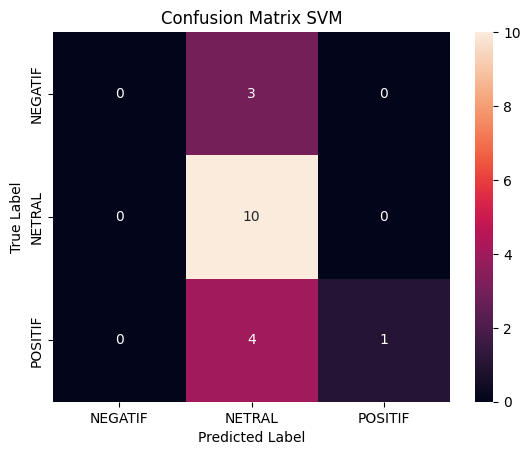

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.6111111111111112
Precision = 0.6045751633986929
Recall = 0.6111111111111112
F-score = 0.5041152263374484


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random-forest-Classifier Algorithm**

data training 70% dan data testing 30% dengan menjadikan test_size=0.3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(Train_X_Tfidf, Train_Y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 112, 175, 237, 300]},
             verbose=2)

In [ ]:
# print how our model looks after hyper-parameter tunning
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 85,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
#check accuracy
print (f'Train Accuracy - : {rf_Grid.score(Train_X_Tfidf,Train_Y):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X_Tfidf,Test_Y):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.778


Classifier - Random-forest Algorithm

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth= 85, max_features='auto', bootstrap=False, min_samples_leaf=2,
                                min_samples_split=5)
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


> **Visualize Classifier - Random-forest Algorithm**

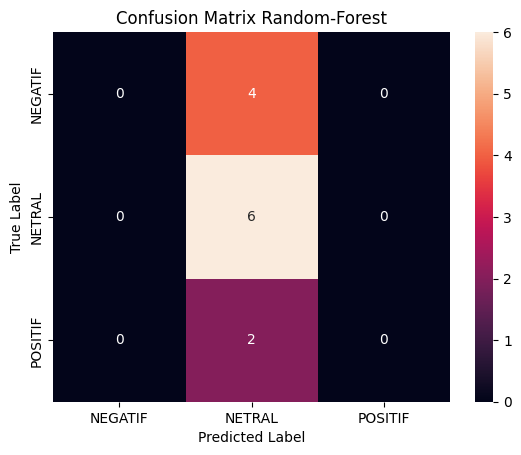

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.5
Precision = 0.25
Recall = 0.5
F-score = 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**SVM Classifier Algorithm (Support vector machine Algorithm)**

data training 80% dan data testing 20% dengan menjadikan test_size=0.2



## **Hold-Out Method**

In [ ]:
corpus = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_2.1_nolemma.xlsx')

In [ ]:
corpus.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Do you have sympathy for the children in North...,do you have sympathy for the children in north...,"['do', 'you', 'have', 'sympathy', 'for', 'the'...","[('do', 'VBP'), ('you', 'PRP'), ('have', 'VB')...","['sympathy', 'children', 'northern', 'pakistan...","['sympathi', 'children', 'northern', 'pakistan...",-0.05,negatif
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's a Muslim but a Shia so don'...,i don't think it's a muslim but a shia so don'...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'a', '...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,Hopefully the last time before being suspended...,hopefully the last time before being suspended...,"['hopefully', 'the', 'last', 'time', 'before',...","[('hopefully', 'RB'), ('the', 'DT'), ('last', ...","['hopefully', 'last', 'time', 'suspended', ','...","['hope', 'last', 'time', 'suspend', ',', 'crit...",0.00,netral
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,"Wow, even though the Saudis are only backing u...","wow, even though the saudis are only backing u...","['wow', ',', 'even', 'though', 'the', 'saudis'...","[('wow', 'NN'), (',', ','), ('even', 'RB'), ('...","['wow', ',', 'even', 'though', 'saudis', 'back...","['wow', ',', 'even', 'though', 'saudi', 'back'...",0.05,positif


> **Text Classification dan Kalkulasi Akurasi**
- data training 80% dan data testing 20% dengan menjadikan test_size=0.2

In [ ]:
#rename colume text_lemmatized into text_final
corpus = corpus.rename(columns={'text_stemmed':'text_final'})

#HOLD-OUT - Dividing testing and training data
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.2)
#Train_X,Test_X,Train_Y,Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.20, random_state=66)
Train_X,Test_X,Train_Y,Test_Y = train_test_split(corpus['text_final'],corpus['label'],test_size=0.2)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
#TF-IDF Vectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#CHECKING
print(Tfidf_vect.vocabulary_)
print(Train_X_Tfidf)

{'sympathi': 293, 'children': 54, 'northern': 211, 'pakistan': 220, 'whose': 325, 'parent': 223, 'massacr': 190, 'taliban': 296, 'shia': 264, 'minor': 195, 'think': 304, 'muslim': 204, 'surpris': 289, 'someon': 271, 'year': 331, 'sinc': 268, 'invas': 149, 'yemen': 332, 'sunnah': 287, 'peopl': 226, 'yam': 330, 'hope': 137, 'last': 168, 'time': 307, 'suspend': 290, 'critic': 71, 'spirit': 276, 'start': 279, 'come': 61, 'back': 29, 'wow': 328, 'even': 100, 'though': 305, 'saudi': 258, 'yemeni': 333, 'govern': 124, 'houthi': 138, 'rebellion': 249, 'complic': 64, 'koranist': 166, 'alway': 14, 'held': 135, 'pray': 234, 'oh': 212, 'accord': 4, 'tradit': 308, 'mean': 192, 'person': 228, 'stingi': 284, 'follow': 111, 'follback': 110, 'porn': 232, 'pl': 230, 'cebong': 51, 'buzzerp': 47, 'pki': 229, 'insult': 147, 'ulama': 315, 'li': 172, 'bashar': 33, 'al': 9, 'assad': 24, 'shiit': 266, 'armi': 21, 'israel': 154, 'behavior': 34, 'bad': 30, 'month': 199, 'ramadhan': 246, 'best': 37, 'opportun': 2

## **SVM Classifier Algorithm (Support vector machine Algorithm)**
> **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)

# fitting the model for grid search
grid.fit(Train_X_Tfidf, Train_Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tunning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
# re-run prediction model
grid_predictions = grid.predict(Test_X_Tfidf)

#print classification report
print(classification_report(Test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.45      0.83      0.59         6
           2       0.00      0.00      0.00         2

    accuracy                           0.42        12
   macro avg       0.15      0.28      0.20        12
weighted avg       0.23      0.42      0.29        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Classifier - SVM Algorithm**

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=10, kernel='rbf', gamma=0.1)
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

> **Visualize Classifier - SVM Algorithm**

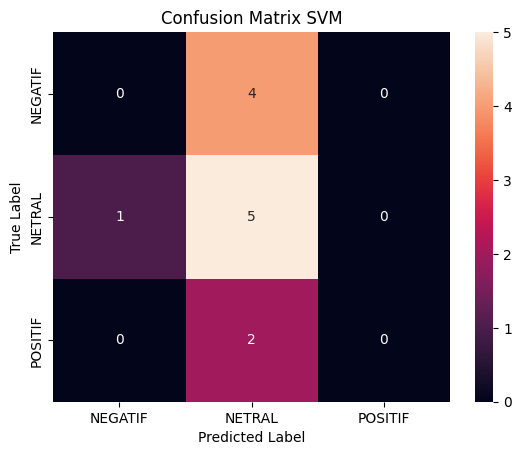

In [ ]:
# visualize classifier SVM algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

SVM RESULT
Accuracy Score = 0.4166666666666667
Precision = 0.22727272727272727
Recall = 0.4166666666666667
F-score = 0.29411764705882354


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Random-forest-Classifier Algorithm** 80:20
> **Hyperparameter Tuning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(Train_X_Tfidf, Train_Y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 112, 175, 237, 300]},
             verbose=2)

In [ ]:
# print how our model looks after hyper-parameter tunning
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 175}

In [ ]:
#check accuracy
print (f'Train Accuracy - : {rf_Grid.score(Train_X_Tfidf,Train_Y ):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(Test_X_Tfidf,Test_Y):.3f}')

Train Accuracy - : 0.915
Test Accuracy - : 0.500


> **Classifier - Random-forest Algorithm**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import model_selection

# fit the training dataset on the classifier
rf_clf = RandomForestClassifier(n_estimators=175, max_depth= 10, max_features='sqrt', bootstrap=False, min_samples_leaf=1,
                                min_samples_split=2)
rf_clf.fit(Train_X_Tfidf, Train_Y)

# predict the labels on validation dataset
predictions_RFC = rf_clf.predict(Test_X_Tfidf )

> **Visualize Classifier - Random-forest Algorithm**

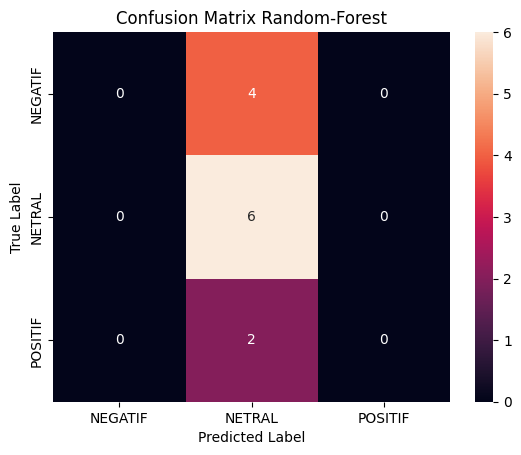

In [ ]:
# visualize classifier Random-forest algorithm toward the data
conf_matrix = confusion_matrix(Test_Y, predictions_RFC)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Random-Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# RANDOM FOREST RESULT
print("RANDOM FOREST RESULT")
print("Accuracy Score =",accuracy_score(predictions_RFC, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_RFC, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

RANDOM FOREST RESULT
Accuracy Score = 0.5
Precision = 0.25
Recall = 0.5
F-score = 0.3333333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
